<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/actuaria/estadistica_multi/tarea_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1 
<b> Crear una función propia de la desviación estandar. </b>

## $ \sigma = [\frac{1}{N}\sum_{i = 1}^{N}{(a_{i} - \bar{a})^2}]^{1/2}   $

In [ ]:
import numpy as np

# Función para calcular la desviación estandar
def desv(x):
  suma = 0  # contador donde se almacenara todas las operaciones que recorra el ciclo for 

  x_bar = np.mean(x) # calcula primero la media del arreglo 
  for i in x:        # ciclo for para sumar los cuadrados de las operaciones hasta el ultimo dato dentro del arreglo 
    suma += (i - x_bar)**2   #  el cuadrado de la resta entre cada i (variable que recorre el ciclo for) y la media 
  div = suma/(len(x)- 1 )     
  raiz = div**(1/2)      # sacamos la raiz 
  return raiz 


a = [3,5,6,4,7,1,6,8,3,5,6,1,7,8,9]

print('Desviación estandar usando numpy: \t{:.3f} '.format(np.std(a)))
print('\n')
print('Desviación estandar usando mi función: \t{:.3f} '.format(desv(a)))

Desviación estandar usando numpy: 	2.380 


Desviación estandar usando mi función: 	2.463 


## Ejercicio 2
<b> . Supongamos que se tienen 4 puntos de datos {x1, x2, x3, x4}, $ xi ∈ R^3$, representados con la
matriz.  </b>



\begin{bmatrix}
4 & 3 & 2 \\
2 & 1 & -2 \\
 4 &  -1 & 2 \\
-2 & 1 & 2
\end{bmatrix}



-  <b>a) Realiza un PCA de los datos X, esto es, encuentra los componentes principales y sus varianzas
asociadas en el sistema coordenado.</b>

-  <b> b)Proyecta los datos en dos dimensiones ¿Qu´e fracci´on de la varianza de X se preserva?
  </b>

In [ ]:
import numpy as np

L = np.array([4, 3, 2, 2, 1, -2, 4, -1, 2, -2, 1,2 ]).reshape(3,4)
L

array([[ 4,  3,  2,  2],
       [ 1, -2,  4, -1],
       [ 2, -2,  1,  2]])

In [ ]:
PCA(L, 2)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


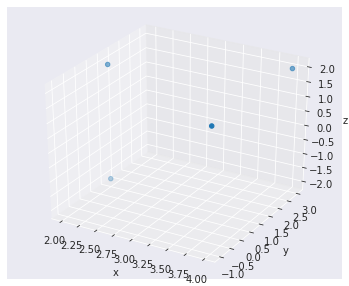

In [ ]:
from matplotlib.cbook import sanitize_sequence
import seaborn as sns 
import matplotlib.pyplot as plt 

x = np.array([4,2, 4, 2])
y = np.array([3,1,-1,1])
z = np.array([2,-2,2,2])

sns.set_style("darkgrid")
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(x, y, z)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd 
datos = [[4, 3, 2],
         [2, 1, -2],
         [4, -1, 2],
         [-2 ,1, 2]]
columnas = ['x', 'y','z'] # definimos los nombres de las columnas

arreglo = pd.DataFrame(datos, columns = columnas)


# Cramos un objeto scaler y aplicamos estandarización a nuestros datos
scaler = StandardScaler()
arreglo_std = scaler.fit_transform(arreglo)

# Cremos un objeto PCA y ajustamos a los datos 
pca = PCA()
pca_objeto = pca.fit_transform(arreglo_std)
pca_arreglo = pd.DataFrame(pca_objeto, columns = ['PC_1', 'PC_2', 'PC_3']) 
print(arreglo)
print('\n')
print(arreglo_std)
print('\n')
print(pca_arreglo)


   x  y  z
0  4  3  2
1  2  1 -2
2  4 -1  2
3 -2  1  2


[[ 0.81649658  1.41421356  0.57735027]
 [ 0.          0.         -1.73205081]
 [ 0.81649658 -1.41421356  0.57735027]
 [-1.63299316  0.          0.57735027]]


       PC_1      PC_2      PC_3
0 -0.816497  0.116058  1.523110
1  0.000000  1.549193 -0.774597
2 -0.816497 -1.148853 -1.006712
3  1.632993 -0.516398  0.258199


In [ ]:
print(pca.explained_variance_ratio_)

[0.33333333 0.33333333 0.33333333]


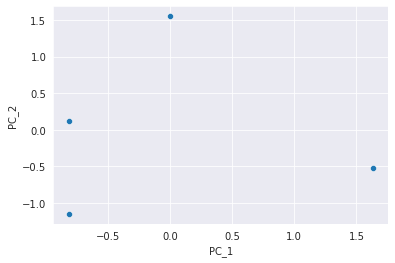

In [ ]:
sns.scatterplot(x = pca_arreglo['PC_1'], y = pca_arreglo['PC_2'])
plt.show()

## Ejercicio 3 

<b>  Genera una muestra aleatoria de tamaño n = 100 a partir de una distribución normal 3-
dimensional, en donde una de las variables tenga una varianza muy grande. Realiza un PCA usando la
matriz de correlación. Además, encuentra los eigenvalores, dibuja la gráfica scree y comenta tus resultados  </b>